# ÖDEV6
# Öğrenci No: 171024011
# Öğrenci Adı ve Soyadı: Yağmur Derya

In [1]:
# gerekli tanımlamalar yapıldı
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read # ses dosyasının okunması için
from IPython.lib.display import Audio

%matplotlib notebook

pi = np.pi
cos = np.cos

## SORU-1

$x[n] = cos(\frac{\pi n}{5})$

In [2]:
n = np.arange(0, 20) # örnek sayısı 20 olacak şekilde indis vektörü tanımlandı
xn = cos(pi*n/5)   # verilen işaret tanımlandı

## a)

$F_s = 40 kHz \rightarrow 50 kHz$ olması için;
$\\ 50 = 40\frac{L}{M} => \frac{L}{M} = \frac{5}{4}$
O zaman L = 5 ile ve M = 4 seçilirse çıkış frekansı 50 kHz olur.

In [3]:
N = 20 # örnek sayısı
L = 5  # sık örnekleme katsayısı
M = 4  # seyrek örnekleme katsayısı

### b)

In [4]:
# sık örnekleme

N_u = N*L                              # sık örneklenmiş işaretin indis uzunluğu
n_u = np.arange(0, N_u)                # indis vektörü

xn_u = np.zeros(N_u)                  
xn_u[np.arange(0, len(xn_u) ,L)] = xn  # L aralıklar ile x[n] işaretinin değerleri x_u[n]'e atandı

In [5]:
# lineer interpolasyon

hn = np.array([0, 1/5, 2/5, 3/5, 4/5, 1, 4/5, 3/5, 2/5, 1/5, 0]) # h[n] işareti oluşturuldu

xn_i = np.convolve(xn_u, hn, 'same')                             # giriş ile filtrenin konvolüsyonu alındı
N_i = len(xn_i)
n_i = np.arange(0, N_i)                                          # indis vektörü oluşturuldu

In [6]:
# seyrek örnekleme 

xn_d = xn_i[np.arange(0, np.size(xn_i, 0), M)] # x_i[n]in M.n noktalarındaki örnekleri alındı
N_d = len(xn_d)
n_d = np.arange(0, N_d)                        # indis vektörü

In [7]:
# frekans domainine geçiş

w = np.arange(-pi, pi, 2*pi/N)         
Xw = np.fft.fftshift(np.fft.fft(xn, N)/N)                    # X(omega)

w_u = np.arange(-pi, pi, 2*pi/N_u)
Xw_u = np.fft.fftshift(np.fft.fft(xn_u, N_u) / N_u)          # X_u(omega)

w_i = np.arange(-pi, pi, 2*pi/N_i)
Xw_i = np.fft.fftshift(np.fft.fft(xn_i, N_i) / N_i)          # X_i(omega)

w_d = np.arange(-pi, pi, 2*pi/N_d)
Xw_d = np.fft.fftshift(np.fft.fft(xn_d, N_d) / N_d)          # X_d(omega)

<IPython.core.display.Javascript object>


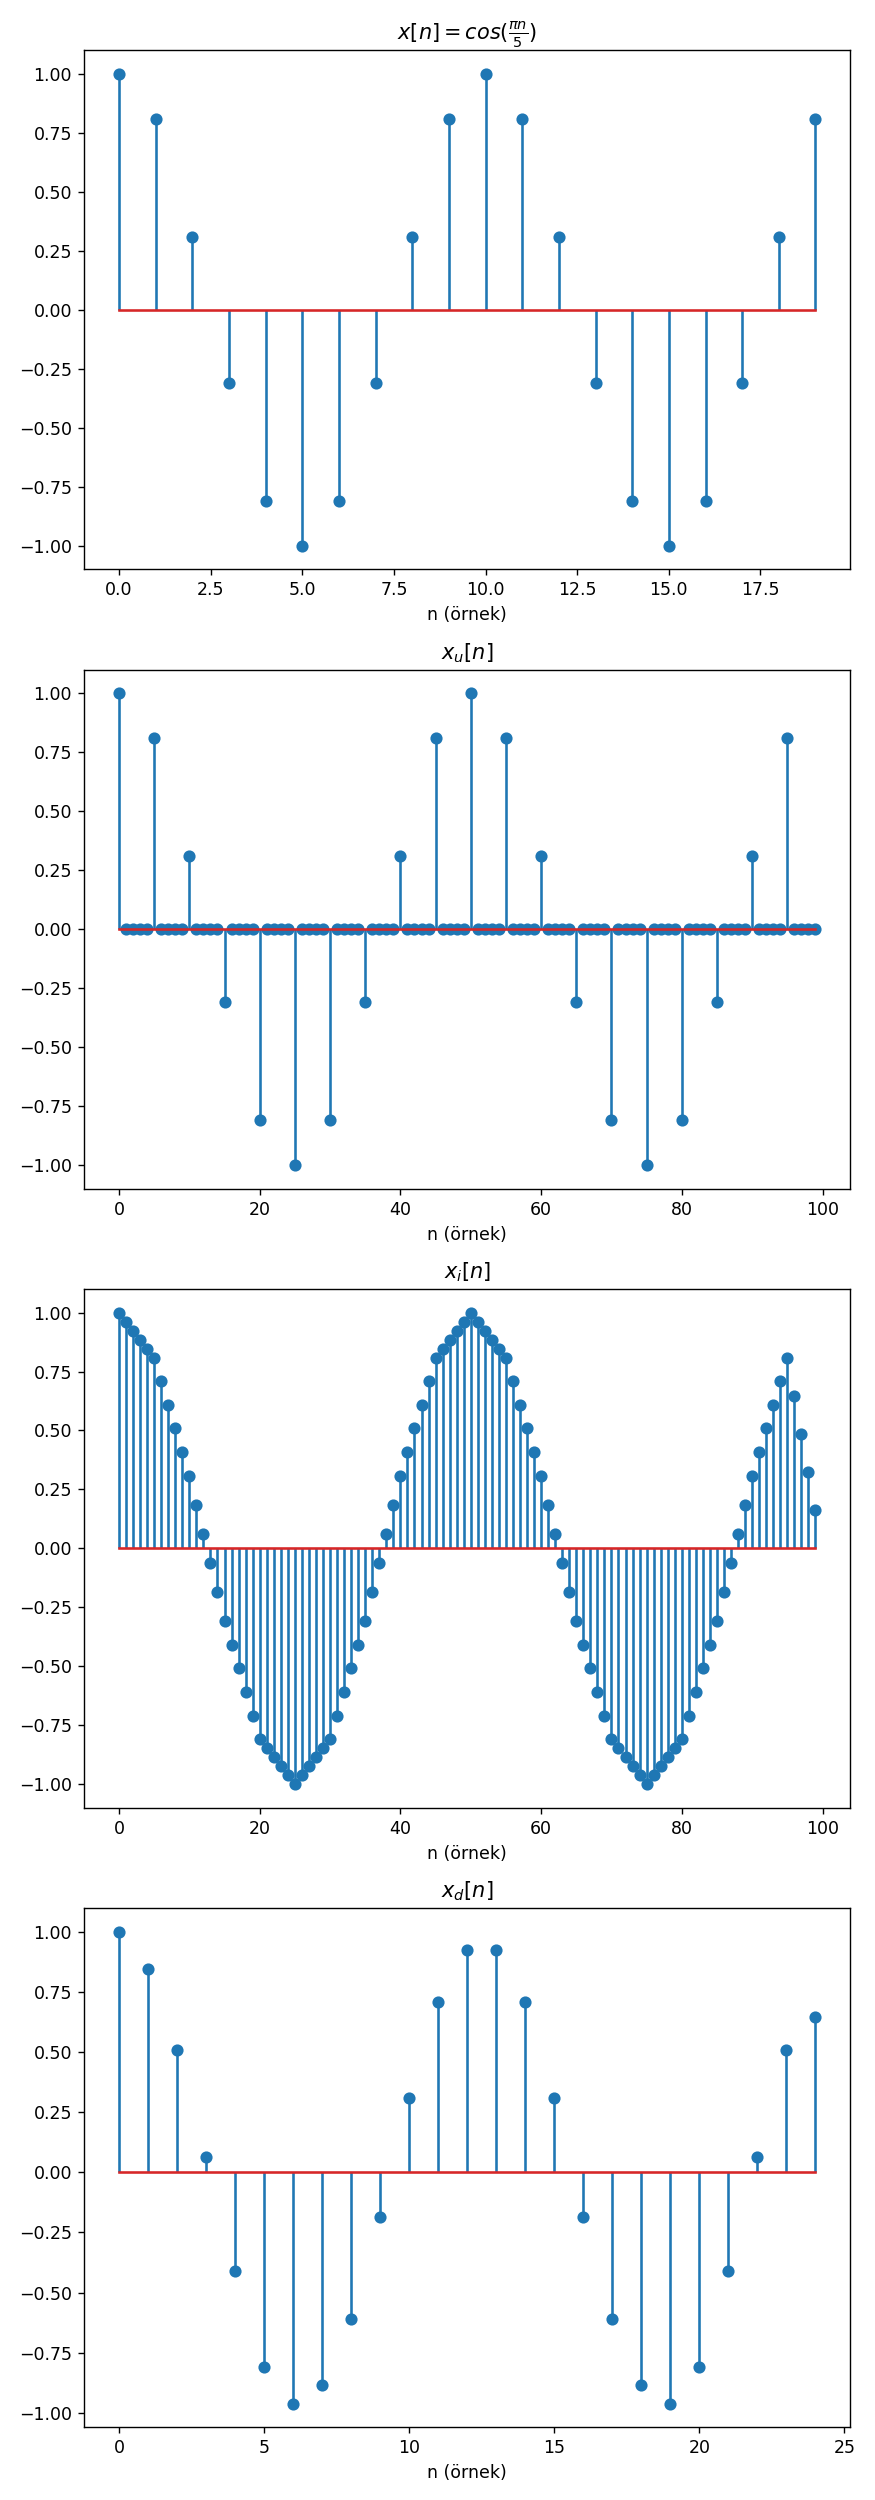

In [8]:
# zaman domaininde işaretleri çizdirme

plt.figure(figsize=(7, 20))

plt.subplot(4, 1, 1), plt.stem(n, xn), plt.title('$x[n]=cos(\\frac{\pi n}{5})$'), plt.xlabel('n (örnek)') # x[n]
plt.subplot(4, 1, 2), plt.stem(n_u, xn_u), plt.title('$x_u[n]$'), plt.xlabel('n (örnek)')                 # x_u[n]
plt.subplot(4, 1, 3), plt.stem(n_i, xn_i), plt.title('$x_i[n]$'), plt.xlabel('n (örnek)')                 # x_i[n]
plt.subplot(4, 1, 4), plt.stem(n_d, xn_d), plt.title('$x_d[n]$'), plt.xlabel('n (örnek)')                 # x_d[n]

plt.tight_layout() 
plt.show()

x[n] işareti L = 5 ile sık örnekleyerek, her örnek arasına L-1 = 4 tane sıfır konulmuş $x_u[n]$ işareti elde edildi. Daha sonra lineer interpolasyon (üçgen dürtü h[n] ve $x_u[n]$ konvolüsyonundan) ile sık örneklenmiş $x_i[n]$ işareti elde edildi. Daha sonra bu işaret M = 4 ile seyrek örneklemeye sokularak (n = 4k noktalarındaki örnekler alındı), $x_d[n]$ işareti elde edildi. Elde edilen bu işaretin, giriş işareti farklı oranlarda örneklendiği için periyodunun (dolayısıyla frekansı da) farklı olduğu görülmektedir.

<IPython.core.display.Javascript object>


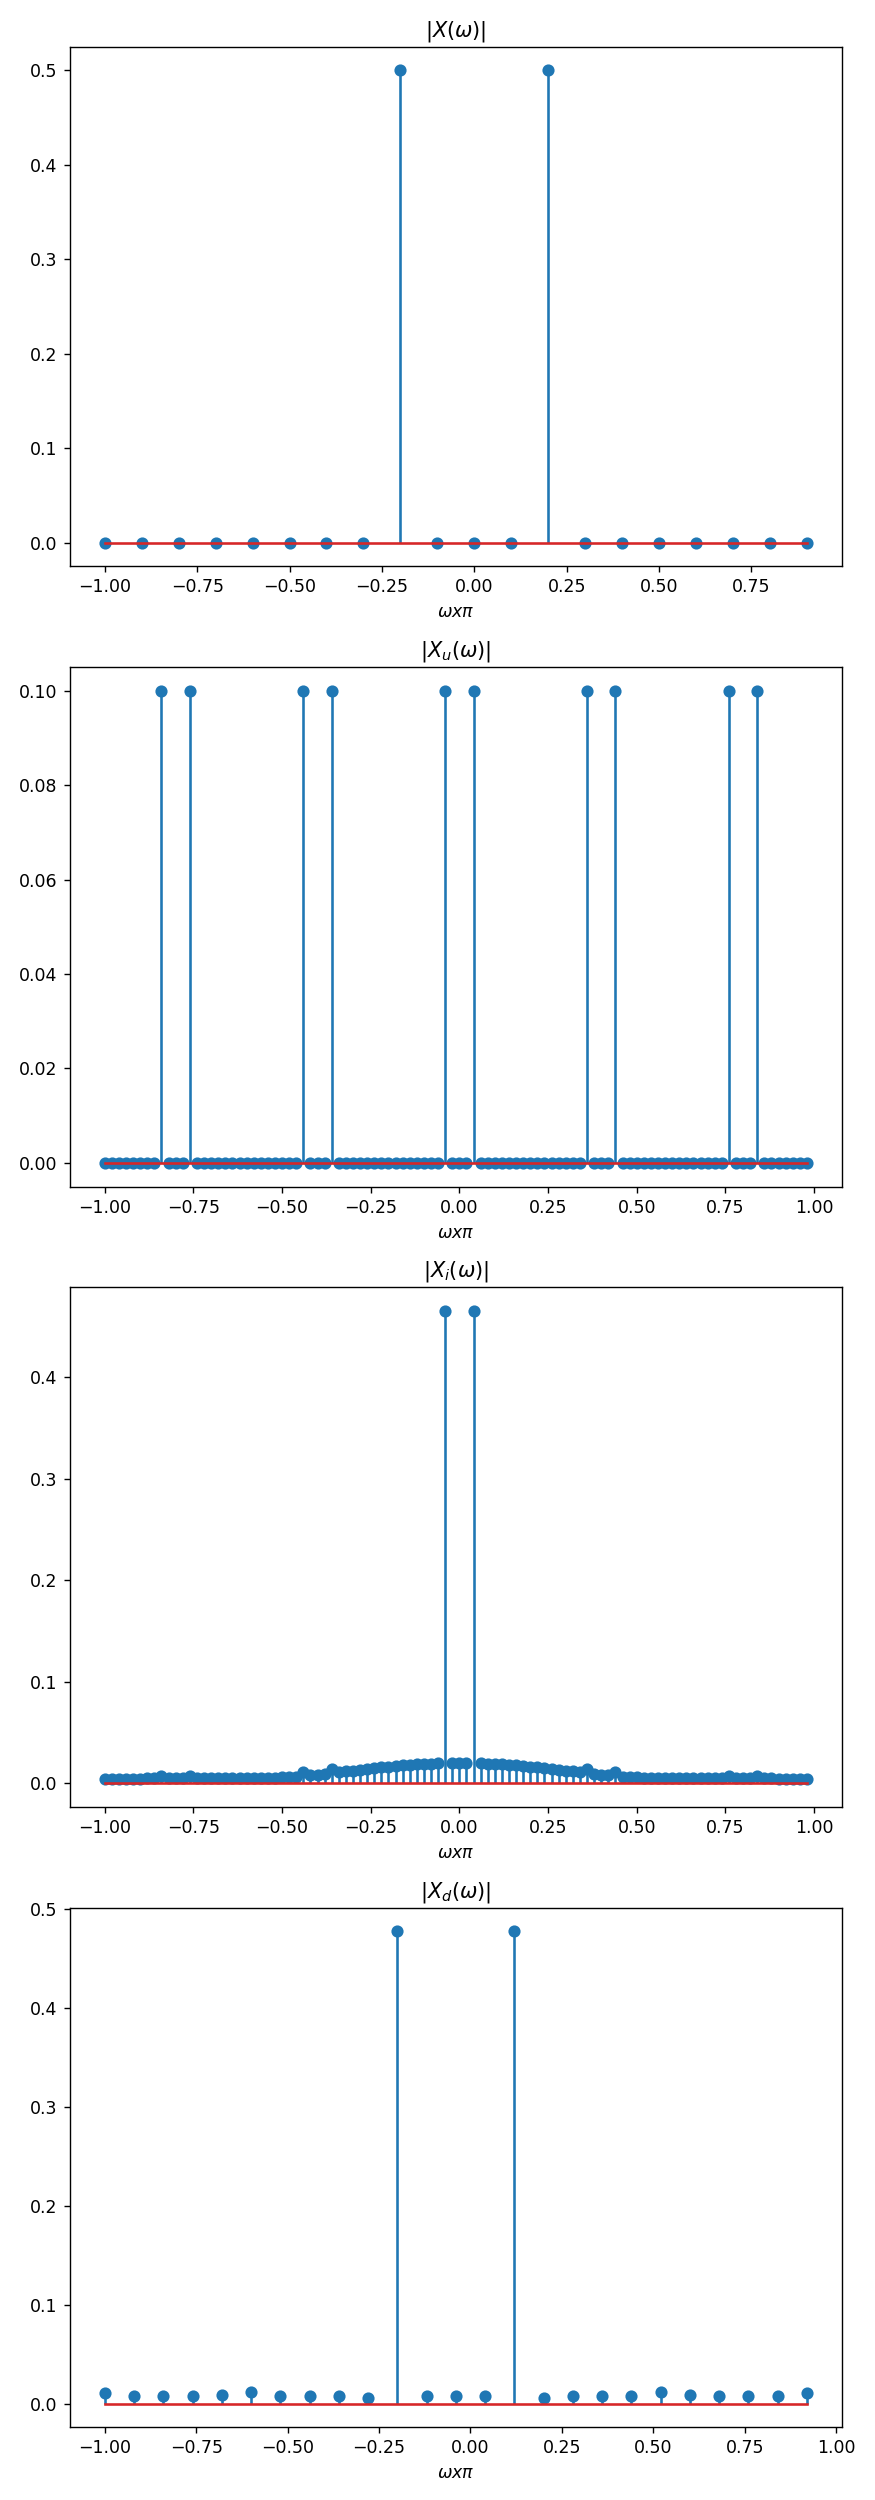

In [9]:
# frekans domaininde işaretleri çizdirme

plt.figure(figsize=(7, 20))

plt.subplot(4, 1, 1), plt.stem(w/pi, abs(Xw)), plt.title('$|X(\omega)|$') , plt.xlabel('$\omega x \pi$')      # X(w)
plt.subplot(4, 1, 2), plt.stem(w_u/pi, abs(Xw_u)), plt.title('$|X_u(\omega)|$'), plt.xlabel('$\omega x \pi$') # X_u(w)
plt.subplot(4, 1, 3), plt.stem(w_i/pi, abs(Xw_i)), plt.title('$|X_i(\omega)|$'), plt.xlabel('$\omega x \pi$') # X_i(w)
plt.subplot(4, 1, 4), plt.stem(w_d/pi, abs(Xw_d)), plt.title('$|X_d(\omega)|$'), plt.xlabel('$\omega x \pi$') # X_d(w)

plt.tight_layout()
plt.show()

İnterpolasyon işlemi öncesi L = 5 ile sık örnekleme yapılmıştı. İşaret örnekleme sonrası 2$\pi$/L ile periyodik olacağı için, 2$\pi$ aralığında işaretin 5 kere görülmesi beklenir ki $x_u[n]$ işareti görüldüğü gibi 5 kere tekrar etmektedir. Fazladan örneklenen işaretleri engellemek için lineer interpolasyon işlemi uygulandı. 

Üçgen dalganın frekans domaninindeki karşılığı $sinc^2()$'dir. Bu sebeple genlikleri her zaman pozitif olacağından, sıfırdan farklı olduğu her noktalada genlikler toplanmaktadır ve olası sıfırlama durumlarına engel olmaktadır. İnterpolasyon işleminin sonucunda da sıfır olması gereken bazı noktaların çok küçük genlikli fakat sıfırdan farklı olduğu görülmektedir.

En son seyrek örnekleme ile çıkış işareti elde edildi. $F_d=\frac{F_u}{M}=\frac{5F_s}{4}$ olduğunu bildiğimiz için, diracların farklı frekans değerlerinde olması beklenmekteydi ve öyle olduğu da görülmekte. Frekansı arttığı için örnek sıklığı artmıştır.

### c)

İnterpolasyona kadar olan kısım b şıkkında yapılanla birebir aynı olduğu için tekrar yapmayıp interpolasyondan itibaren olan kısmı yaptım.

In [10]:
# frekans domaininde AGF

hw = np.zeros(N_u)
indis = np.where(abs(w_i) <= pi/L) # |w_c|<= pi/L noktalarının indis değerleri bulundu
hw[indis] = L                      # bu indis değerlerinde filtrenin kazancı tanımlandı

In [11]:
# X_i(w)
Xw_ic = Xw_u*hw    # X_u(w) işareti b şıkkında hesaplanmıştı
N_ic = len(Xw_ic)    # indis boyu tanımlandı

# x_i[n]
xn_ic = np.fft.ifft(np.fft.ifftshift(Xw_ic), N_ic) * N_ic # x_i[n]
n_ic = np.arange(0, N_ic)                         # indis vektörü

In [12]:
# seyrek örnekleme 
# x_d[n]
xn_dc = xn_ic[np.arange(0, np.size(xn_ic, 0), M)]       # x_i[n]in M.n noktalarındaki örnekleri alındı
N_dc = len(xn_dc)
n_dc = np.arange(0, N_dc)                               # indis vektörü

# X_d(w)
w_dc = np.arange(-pi, pi, 2*pi/N_dc)
Xw_dc = np.fft.fftshift(np.fft.fft(xn_dc, N_dc) / N_dc) # X_d(omega)

<IPython.core.display.Javascript object>


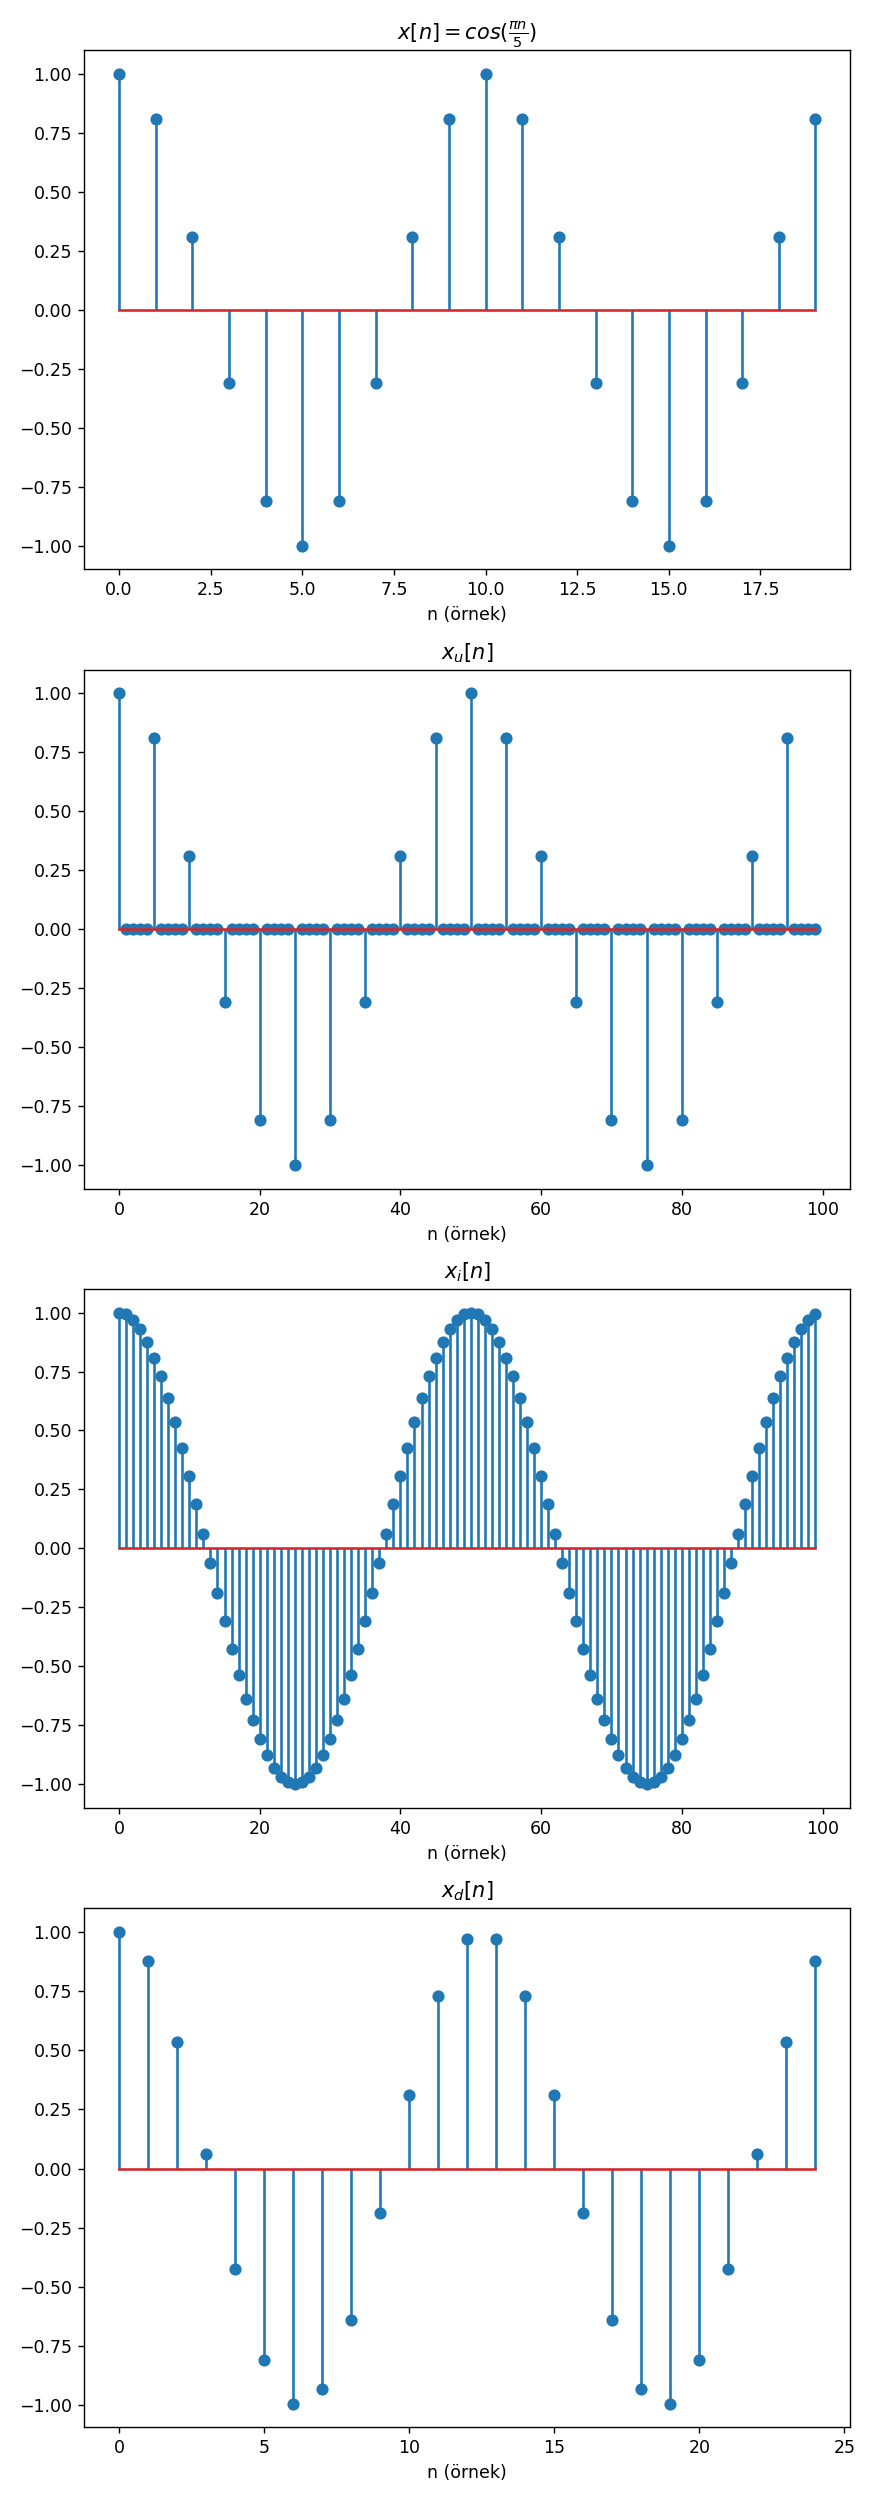

In [13]:
# zaman domaininde işaretleri çizdirme

plt.figure(figsize=(7, 20))

plt.subplot(4, 1, 1), plt.stem(n, xn), plt.title('$x[n]=cos(\\frac{\pi n}{5})$'), plt.xlabel('n (örnek)')   # x[n]
plt.subplot(4, 1, 2), plt.stem(n_u, xn_u), plt.title('$x_u[n]$'), plt.xlabel('n (örnek)')                   # x_u[n]
plt.subplot(4, 1, 3), plt.stem(n_ic, xn_ic.real), plt.title('$x_i[n]$'), plt.xlabel('n (örnek)')            # x_i[n]
plt.subplot(4, 1, 4), plt.stem(n_dc, xn_dc.real), plt.title('$x_d[n]$'), plt.xlabel('n (örnek)')            # x_d[n]

plt.tight_layout() 
plt.show()

YORUM YAZ

<IPython.core.display.Javascript object>


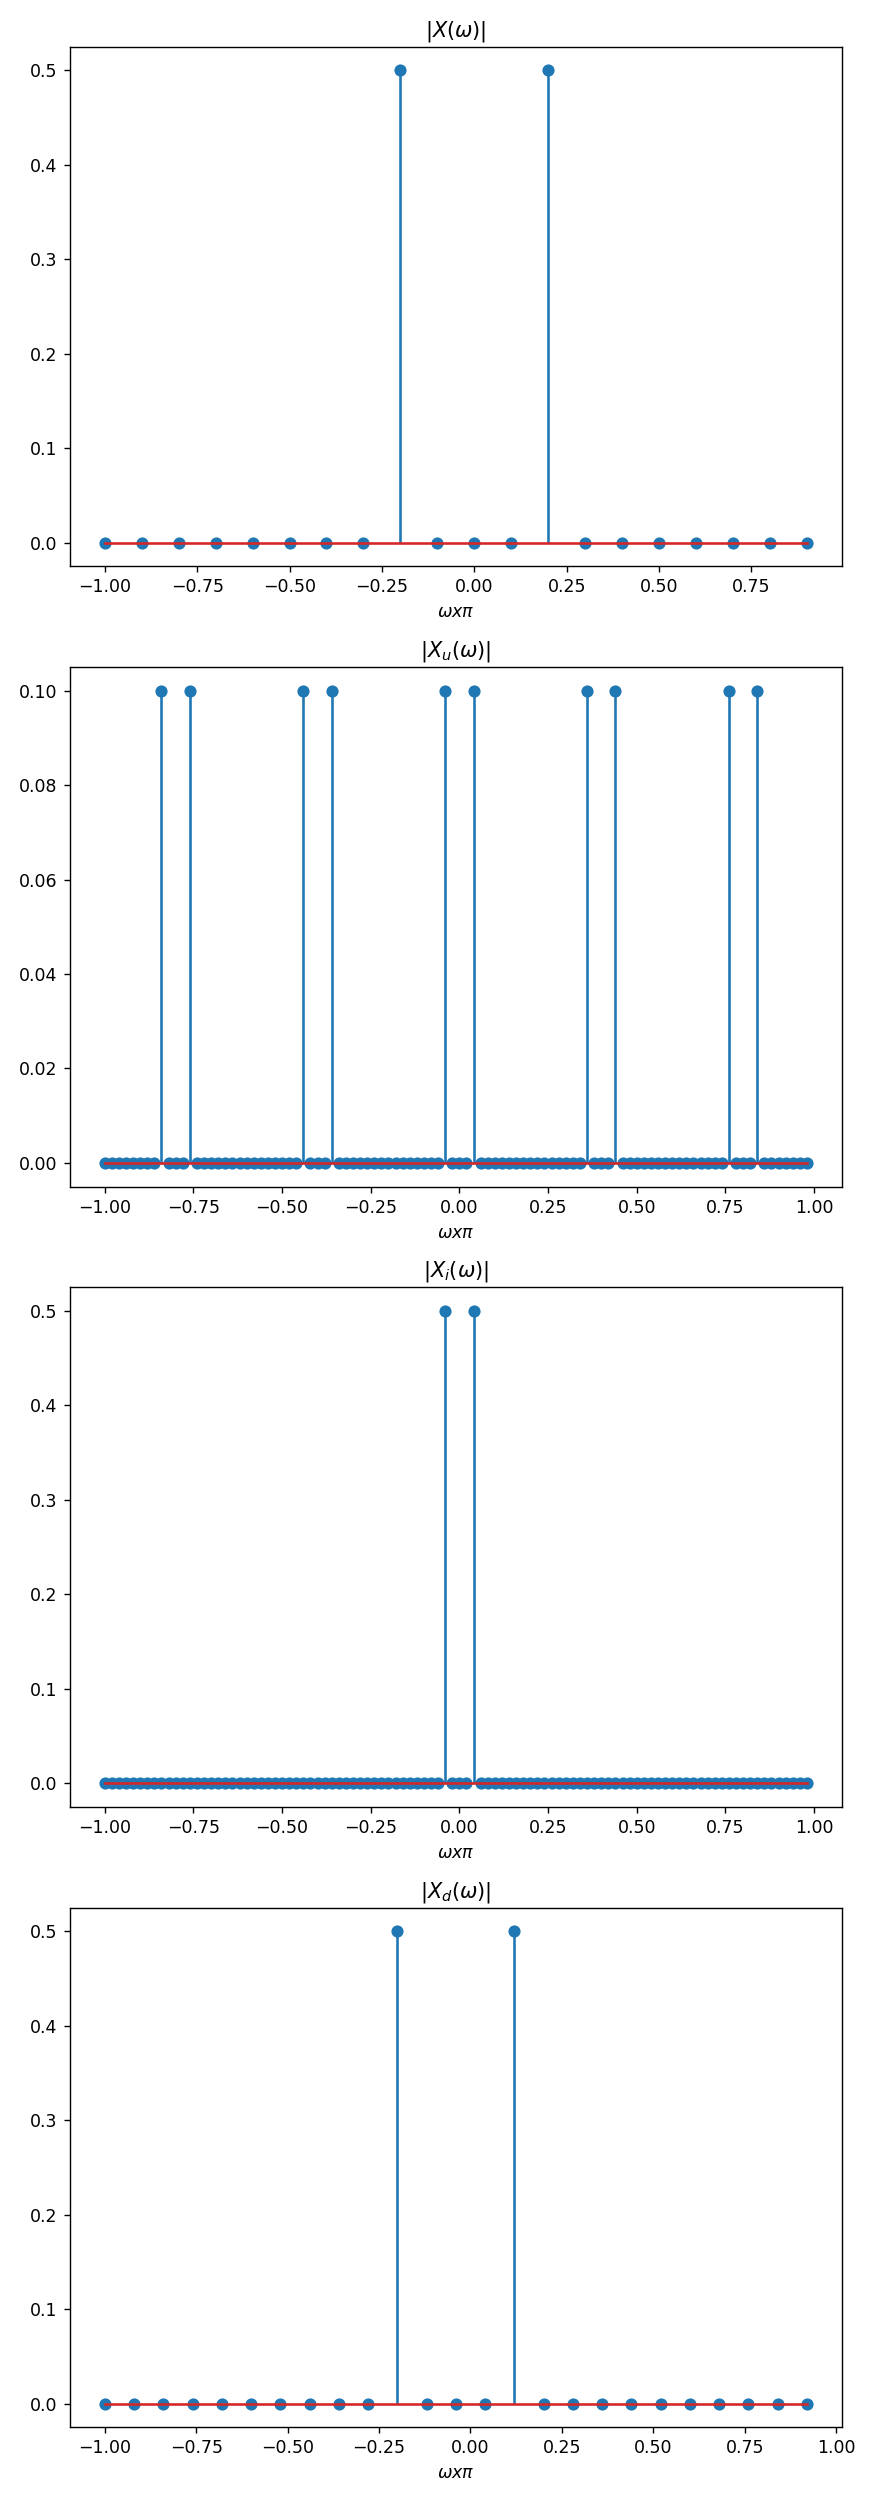

In [14]:
# frekans domaininde işaretleri çizdirme

plt.figure(figsize=(7, 20))

plt.subplot(4, 1, 1), plt.stem(w/pi, abs(Xw)), plt.title('$|X(\omega)|$') , plt.xlabel('$\omega x \pi$')        # X(w)
plt.subplot(4, 1, 2), plt.stem(w_u/pi, abs(Xw_u)), plt.title('$|X_u(\omega)|$'), plt.xlabel('$\omega x \pi$')   # X_u(w)
plt.subplot(4, 1, 3), plt.stem(w_i/pi, abs(Xw_ic)), plt.title('$|X_i(\omega)|$'), plt.xlabel('$\omega x \pi$')  # X_i(w)
plt.subplot(4, 1, 4), plt.stem(w_dc/pi, abs(Xw_dc)), plt.title('$|X_d(\omega)|$'), plt.xlabel('$\omega x \pi$') # X_d(w)

plt.tight_layout()
plt.show()

YORUM YAP

## SORU-2

In [15]:
Fs, x = read("odev6.wav")           # ses dosyası okundu

print("x'in boyutu: ", x.shape)     # x'in boyutu 
print("örnekleme frekansı: ", Fs)   # örnekleme frekansı

x'in boyutu:  (288000, 2)
örnekleme frekansı:  48000


İşaret 2 kanaldan oluşuyor ve her kanalda 288K örnek var. Örnekleme frekansı $F_s=48$KHz.

### a)

In [16]:
xn2 = x[:,1]         # sadece 1. kanalın örnekleri alındı
N2 = len(xn2)
n2 = np.arange(0, N2) # iki periyot

M_a = 2              # seyrek örnekleme katsayısı
L_a = 2              # sık örnekleme katsayısı

In [17]:
# seyrek örnekleme 

xn_d2 = xn2[np.arange(0, np.size(xn2, 0), M_a)] # x[n]in M.n noktalarındaki örnekleri alındı
N_d2 = len(xn_d2)
n_d2 = np.arange(0, N_d2)                       # indis vektörü

In [18]:
# sık örnekleme

N_u2 = N_d2*L_a                             # sık örneklenmiş işaretin indis uzunluğu

# zaman domaininde
n_u2 = np.arange(0, N_u2)                   # indis vektörü

xn_u2 = np.zeros(N_u2)                  
xn_u2[np.arange(0, len(xn_u2) ,L_a)] = xn_d2  # L aralıklar ile x_d[n] işaretinin değerleri x_u[n]'e atandı

# X_u(w)
w_u2 = np.arange(-pi, pi, 2*pi/N_u2)

Xw_u2 = np.fft.fftshift(np.fft.fft(xn_u2, N_u2) / N_u2) # X_u(omega)

In [19]:
# lineer interpolasyon

hn2 = np.array([0, 1/2, 1, 1/2, 0])     # L = 2 için h[n] işareti oluşturuldu

xn_i2 = np.convolve(xn_u2, hn2, 'same') # giriş ile filtrenin konvolüsyonu alındı
N_i2 = len(xn_i2)
n_i2 = np.arange(0, N_i2)               # indis vektörü oluşturuldu

# X_i(w)
w_i2 = np.arange(-pi, pi, 2*pi/N_i2)

Xw_i2 = np.fft.fftshift(np.fft.fft(xn_i2, N_i2) / N_i2) # X_u(omega)

In [20]:
# frekans domaininde AGF

w_i22 = np.arange(-pi, pi, 2*pi/N_u2)

hw2 = np.zeros(N_u2)
indis2 = np.where(abs(w_i22) <= pi/L_a)  # |w_c|<= pi/L noktalarının indis değerleri bulundu
hw2[indis2] = L_a                        # bu indis değerlerinde filtrenin kazancı tanımlandı

# X_i(w)
Xw_i22 = Xw_u2*hw2 
N_i22 = len(Xw_i22)    # indis boyu tanımlandı

# x_i[n]
xn_i22 = np.fft.ifft(np.fft.ifftshift(Xw_i2), N_i22) * N_i22 # x_i[n]
n_i22 = np.arange(0, N_i22)                                  # indis vektörü

In [21]:
# frekans domaininde

w2 = np.arange(-pi, pi, 2*pi/N2)
Xw2 = np.fft.fftshift(np.fft.fft(xn2, N2) / N2)        # X(omega)

w_d2 = np.arange(-pi, pi, 2*pi/N_d2)
Xw_d2 = np.fft.fftshift(np.fft.fft(xn_d2, N_d2) / N_d2) # X_d(omega)

In [22]:
print('x[n] işareti için: ')
display(Audio(xn2, rate = Fs))

print('x_d[n] işareti için: ')
display(Audio(xn_d2, rate = Fs/M_a))

print('x_i[n] (lineer interpolasyon) işareti için: ')
display(Audio(xn_i2, rate = Fs))

print('x_i[n] (ideal AGF) işareti için: ')
display(Audio(xn_i22.real, rate = Fs))

x[n] işareti için: 


x_d[n] işareti için: 


x_i[n] (lineer interpolasyon) işareti için: 


x_i[n] (ideal AGF) işareti için: 


<IPython.core.display.Javascript object>


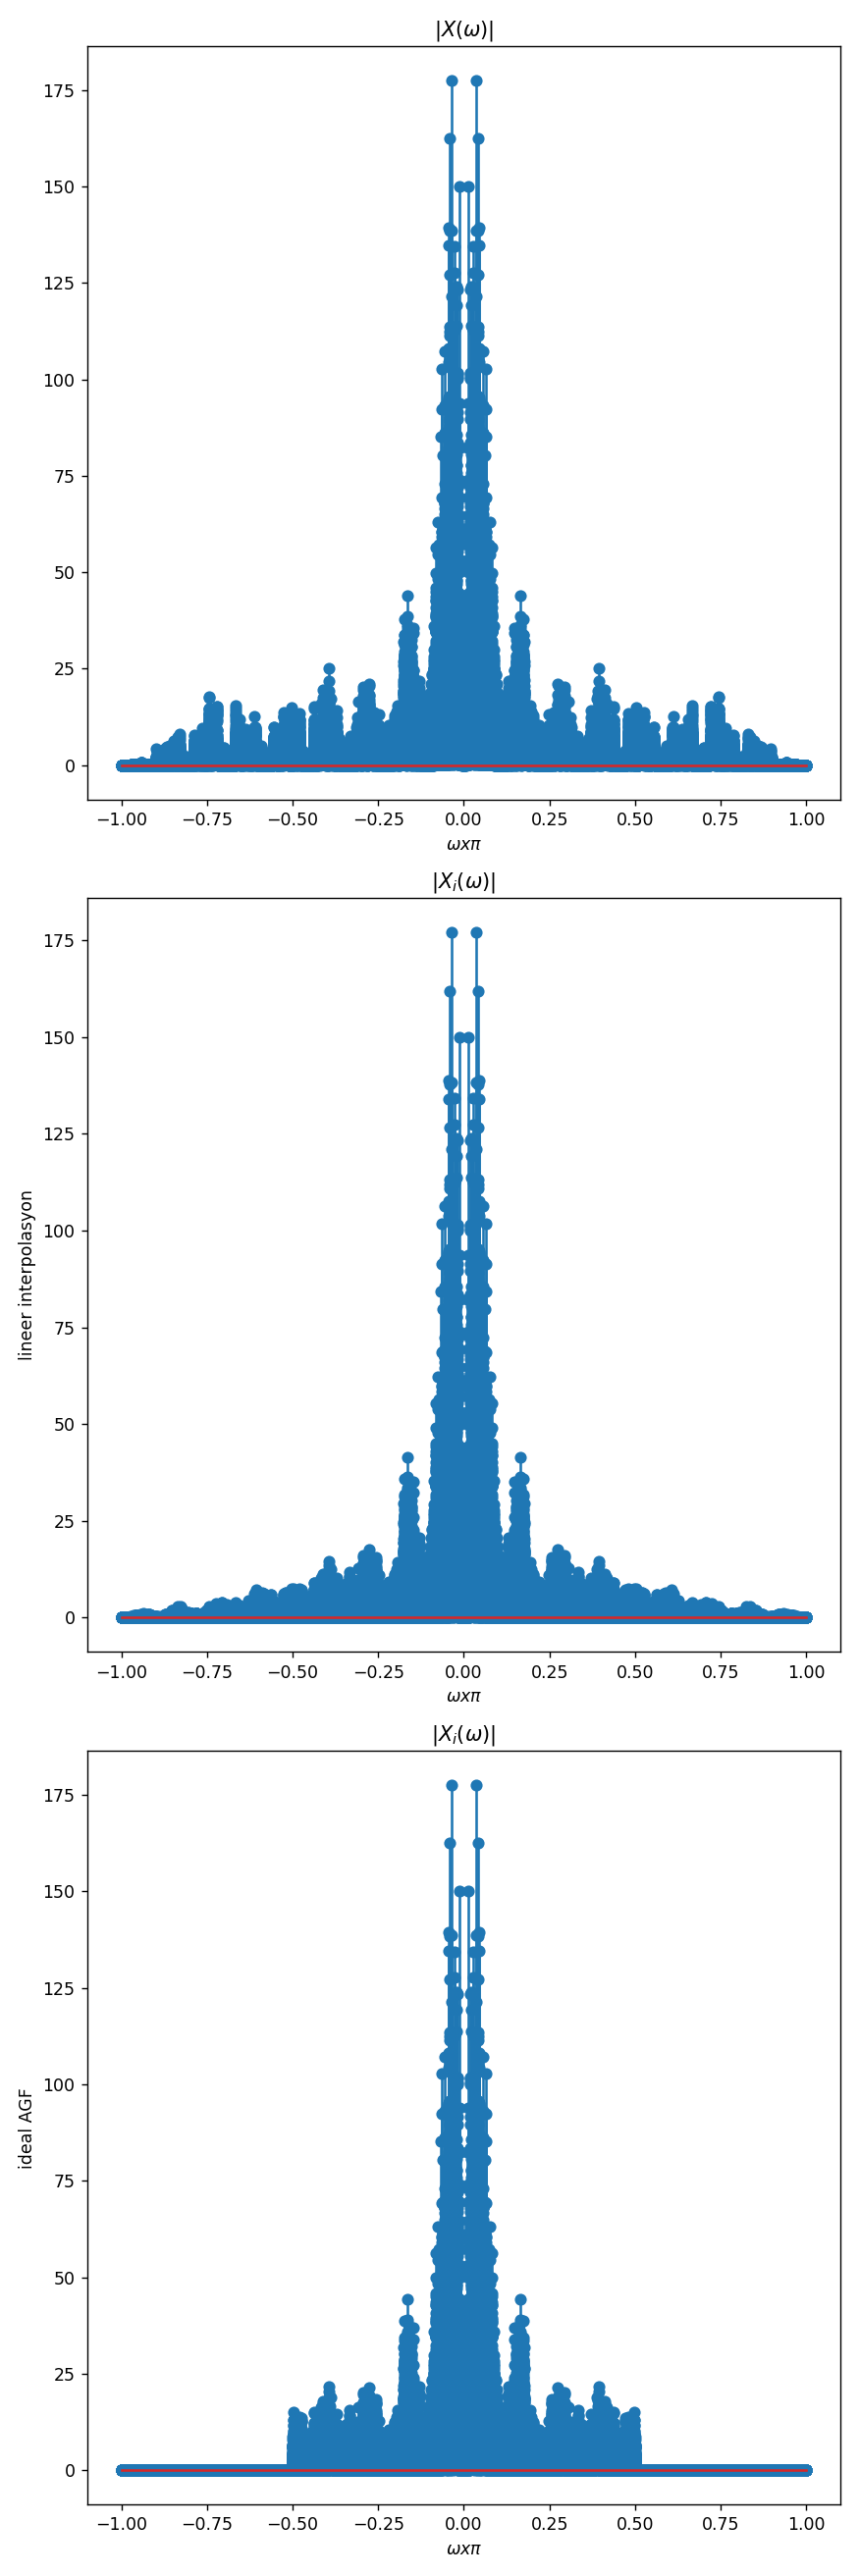

In [23]:
plt.figure(figsize=(7, 21))

plt.subplot(3, 1, 1), plt.stem(w2/pi, abs(Xw2)), plt.title('$|X(\omega)|$') , plt.xlabel('$\omega x \pi$')       # X(w)

plt.subplot(3, 1, 2), plt.stem(w_i2/pi, abs(Xw_i2)), plt.title('$|X_i(\omega)|$'), plt.xlabel('$\omega x \pi$')  # lin int.
plt.ylabel('lineer interpolasyon')

plt.subplot(3, 1, 3), plt.stem(w_i22/pi, abs(Xw_i22)), plt.title('$|X_i(\omega)|$'), plt.xlabel('$\omega x \pi$') # AGF
plt.ylabel('ideal AGF')

plt.tight_layout()
plt.show()

İnsan kulağı 20-20 kHz arasındaki sesleri algılar. Bu sebeple örnekleme frekansının minimum 40 kHz olması yeterlidir. Sesler dinlendiği zaman en son elde edilen $x_d[n]$ ses işaretinde bir miktar bozulma olduğu fark edilmektedir. Bunun sebebi örnekleme frekansının 48/2 = 24 kHz olmasıdır. Filtrelerden geçtikten sonra elde edilen işaretler dinlendiğinde, birbirleri ve giriş işareti ile aralarında belirgin bir fark elde edilmedi fakat frekans domaininde bu üç işaret incelendiğinde, işaretlerde ufak bozulmalar olduğu, girişle birebir aynı olmadığı görülmekte.

### b)

In [24]:
M_b = 6              # seyrek örnekleme katsayısı
L_b = 6              # sık örnekleme katsayısı

In [25]:
# seyrek örnekleme 

#zaman domaininde

xn_d2b = xn2[np.arange(0, np.size(xn2, 0), M_b)]   # x[n]in M.n noktalarındaki örnekleri alındı
N_d2b = len(x)/M_b
n_d2b = np.arange(0, N_d2b)                        # indis vektörü

# X_d(w)

w_d2b = np.arange(-pi, pi, 2*pi/N_d2b)
Xw_d2b = np.fft.fftshift(np.fft.fft(xn_d2b, N_d2b) / N_d2b)

In [26]:
# sık örnekleme

# zaman domaininde
N_u2b = round(N_d2b)*L_b                     # sık örneklenmiş işaretin indis uzunluğu
n_u2b = np.arange(0, N_u2b)                  # indis vektörü

xn_u2b = np.zeros(N_u2b)                  
xn_u2b[np.arange(0, len(xn_u2b) ,L_b)] = xn_d2b  # L aralıklar ile x_n[n] işaretinin değerleri x_u[n]'e atandı

# X_u(w)
w_u2b = np.arange(-pi, pi, 2*pi/N_u2b)

Xw_u2b = np.fft.fftshift(np.fft.fft(xn_u2b, N_u2b) / N_u2b)

In [27]:
# lineer interpolasyon

hn2b = np.array([0, 1/6, 2/6, 3/6, 4/6, 5/6, 1, 5/6, 4/6, 3/6, 2/6, 1/6, 0]) # L = 6 için h[n] işareti oluşturuldu

xn_i2b = np.convolve(xn_u2b, hn2b, 'same') # giriş ile filtrenin konvolüsyonu alındı
N_i2b = len(xn_i2b)
n_i2b = np.arange(0, N_i2b)                # indis vektörü oluşturuldu

# X_i(w)
w_i2b = np.arange(-pi, pi, 2*pi/N_i2b)

Xw_i2b = np.fft.fftshift(np.fft.fft(xn_i2b, N_i2b) / N_i2b) # X_u(omega)

In [28]:
# frekans domaininde AGF

w_i22b = np.arange(-pi, pi, 2*pi/N_u2b)

hw2b = np.zeros(N_u2b)
indis2b = np.where(abs(w_i22b) <= pi/L_b)  # |w_c|<= pi/L noktalarının indis değerleri bulundu
hw2b[indis2b] = L_b                       # bu indis değerlerinde filtrenin kazancı tanımlandı

# X_i(w)
Xw_i22b = Xw_u2b*hw2b 
N_i22b = len(Xw_i22b)    # indis boyu tanımlandı

# x_i[n]
xn_i22b = np.fft.ifft(np.fft.ifftshift(Xw_i22b), N_i22b) * N_i22b # x_i[n]
n_i22b = np.arange(0, N_i22b)                                   # indis vektörü

In [29]:
print('x[n] işareti için: ')
display(Audio(xn2, rate = Fs))

print('x_d[n] işareti için: ')
display(Audio(xn_d2b, rate = Fs/M_b))

print('x_i[n] (lineer interpolasyon) işareti için: ')
display(Audio(xn_i2b, rate = Fs))

print('x_i[n] (ideal AGF) işareti için: ')
display(Audio(xn_i22b.real, rate = Fs))

x[n] işareti için: 


x_d[n] işareti için: 


x_i[n] (lineer interpolasyon) işareti için: 


x_i[n] (ideal AGF) işareti için: 


<IPython.core.display.Javascript object>


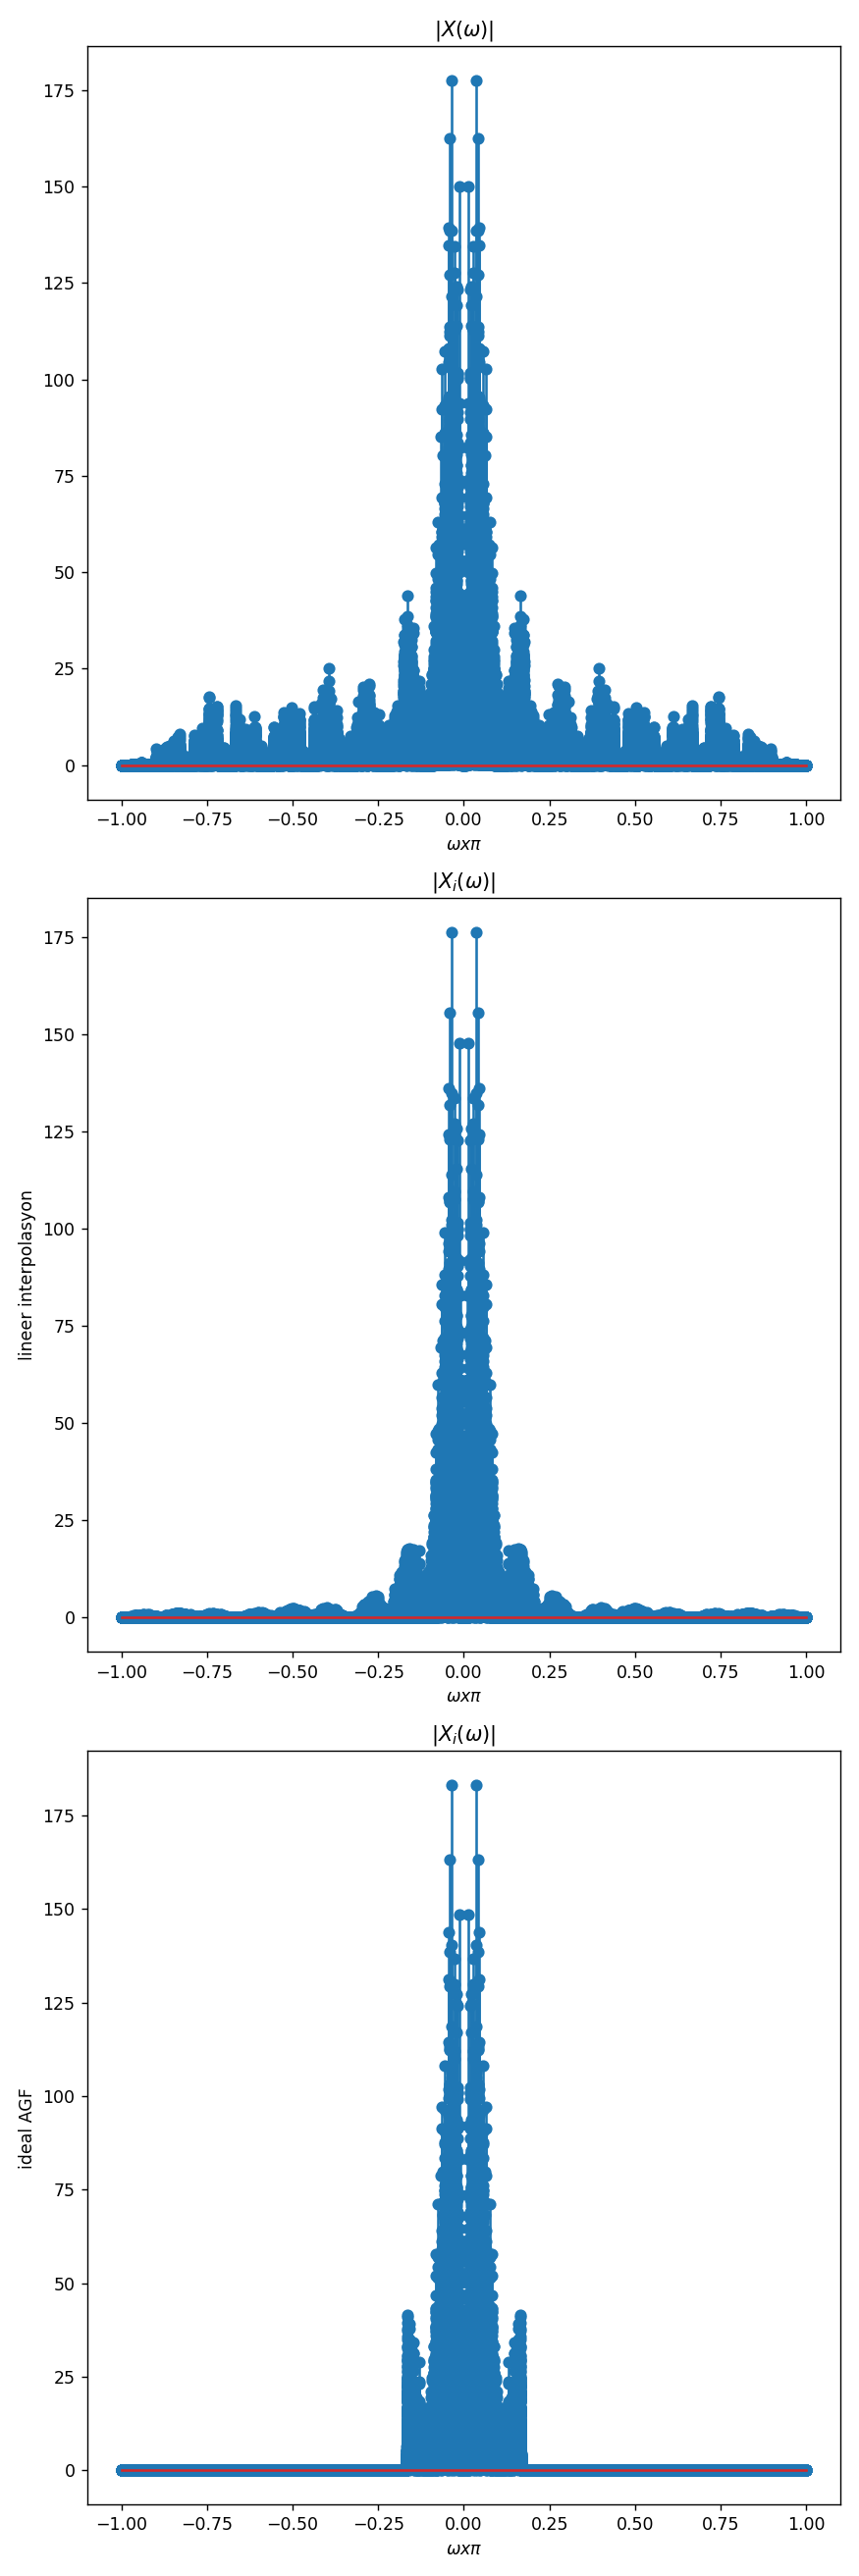

In [30]:
plt.figure(figsize=(7, 21))

plt.subplot(3, 1, 1), plt.stem(w2/pi, abs(Xw2)), plt.title('$|X(\omega)|$') , plt.xlabel('$\omega x \pi$')         # X(w)

plt.subplot(3, 1, 2), plt.stem(w_i2b/pi, abs(Xw_i2b)), plt.title('$|X_i(\omega)|$'), plt.xlabel('$\omega x \pi$')  # lin int.
plt.ylabel('lineer interpolasyon')

plt.subplot(3, 1, 3), plt.stem(w_i22b/pi, abs(Xw_i22b)), plt.title('$|X_i(\omega)|$'), plt.xlabel('$\omega x \pi$') # AGF
plt.ylabel('ideal AGF')

plt.tight_layout()
plt.show()

Bu sefer seslerdeki bozulma bariz bir şekilde fark edilmekte. Fd = 48/6 = 8 kHz'dir dolayısıyla bozulma daha fazladır. Daha sonra sık örneklenip filtrelerden geçirilen işaretler $x_u[n]$'e göre daha iyi durumdadır fakat yine de bozulma olduğu bellidir. Frekans domaininde incelendiğinde ideal AGF sonucu elde edilen işaretin girişe daha fazla benzediği görülmekte fakat kesim frekansı $\pi$/6 olduğu için, işarette kayıplar mevcuttur. Lineer interpolasyonda ise yandaki kayıplar daha az olmakla beraber, $|\omega|\leq\pi/6$ aralığında ideal AGF'ye göre giriş daha bozuk elde edilmiştir.

## Ek Çalışma

In [31]:
xn = np.array([2, 3.2, 4, -5, -6.7, 7.8, 15]) # giriş işareti
N3 = 7 # örnek sayısı

# sistem 1 sık örnekleme katsayıları
L11 = 2
L12 = 3 

# sistem 2 sık örnekleme katsayısı
L2 = 6

In [32]:
# SİSTEM - 1
# sık örnekleme (L = 2)
 
N_u11 = N3*L11                              # sık örneklenmiş işaretin indis uzunluğu
n_u11 = np.arange(0, N_u11)                 # indis vektörü

xn_u11 = np.zeros(N_u11)                  
xn_u11[np.arange(0, len(xn_u11) ,L11)] = xn # L aralıklar ile x[n] işaretinin değerleri x_u[n]'e atandı

# lineer interpolasyon

hn11 = np.array([0, 1/2, 1, 1/2, 0])        # L=2 için h[n] işareti oluşturuldu

xn_i1 = np.convolve(xn_u11, hn11, 'same')   # giriş ile filtrenin konvolüsyonu alındı
N_i1 = len(xn_i1)
n_i1 = np.arange(0, N_i1)                   # indis vektörü oluşturuldu""

# sık örnekleme (L = 3)

N_u12 = N_u11*L12                             # sık örneklenmiş işaretin indis uzunluğu
n_u12 = np.arange(0, N_u12)                   # indis vektörü

xn_u12 = np.zeros(N_u12)                  
xn_u12[np.arange(0, len(xn_u12) ,L12)] = xn_i1 # L aralıklar ile x_i[n] işaretinin değerleri x_u2[n]'e atandı


# lineer interpolasyon

hn12 = np.array([0, 1/3, 2/3, 1, 2/3, 1/3, 0])  # L=3 için h[n] işareti oluşturuldu

yn_1 = np.convolve(xn_u12, hn12, 'same')        # giriş ile filtrenin konvolüsyonu alındı
N_y1 = len(yn_1)
n_y1 = np.arange(0, N_y1)                       # indis vektörü oluşturuldu

In [33]:
# SİSTEM-2

N_u2 = N3*L2                              # sık örneklenmiş işaretin indis uzunluğu
n_u2 = np.arange(0, N_u2)                 # indis vektörü

xn_u2 = np.zeros(N_u2)                  
xn_u2[np.arange(0, len(xn_u2) ,L2)] = xn  # L aralıklar ile x[n] işaretinin değerleri x_u[n]'e atandı

# lineer interpolasyon

hn2 = np.array([0, 1/6, 2/6, 3/6, 4/6, 5/6, 1, 5/6, 4/6, 3/6, 2/6, 1/6, 0]) # L=6 için h[n] işareti oluşturuldu

yn_2 = np.convolve(xn_u2, hn2, 'same')    # giriş ile filtrenin konvolüsyonu alındı
N_y2 = len(yn_2)
n_y2 = np.arange(0, N_y2)                 # indis vektörü oluşturuldu

<IPython.core.display.Javascript object>


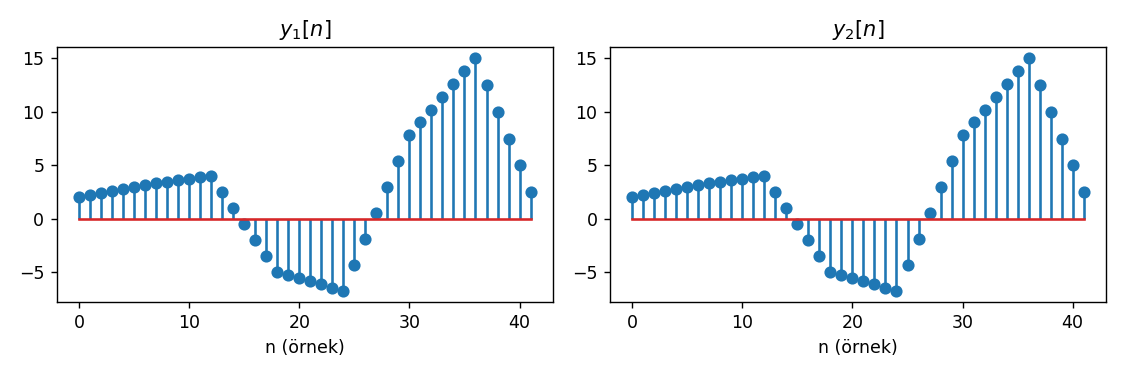

In [34]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1), plt.stem(n_y1, yn_1), plt.title('$y_1[n]$'), plt.xlabel('n (örnek)') # y1[n]
plt.subplot(1, 2, 2), plt.stem(n_y2, yn_2), plt.title('$y_2[n]$'), plt.xlabel('n (örnek)') # y2[n]

plt.tight_layout()
plt.show()

İki sistemin de çıkışında aynı işaret elde edildi. İki kere üst üste sık örneklenen işaretin  çıkışında 2.3.7 = örnekten oluşan işaret olması beklenmekteydi. Aynı şekilde ikinci sistemin çıkışında da 6.7 = 47 örnekten oluşan işaretin çıkması beklenmekteydi. İkisi de lineer interpolasyon filtresinden geçtiği ve örneklenme sayısı eşit olduğu için aynı işaretlerin elde edilmesi zaten beklenmekteydi.